Accordion(children=(VBox(children=(Label(value='Revenue Metrics: Input values representing the expected increa…

Button(button_style='success', description='Calculate ROI', style=ButtonStyle())

,Total Benefits,Total Costs,Net Benefits,ROI (%),People Cost Reduction,Time Saved Value
0,"580,000.00","155,000.00","425,000.00",274.19,"300,000.00","100,000.00"


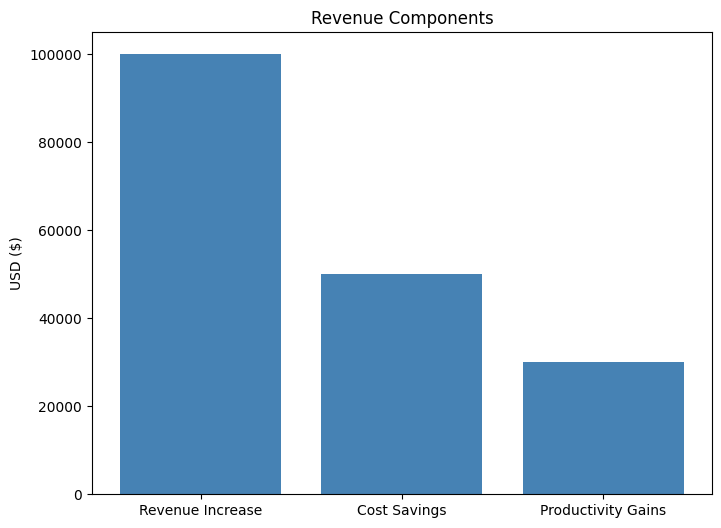

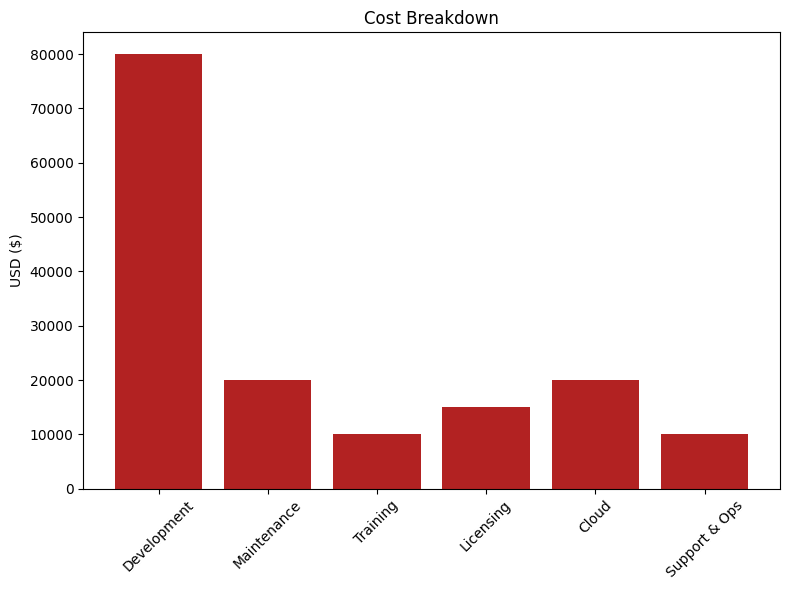

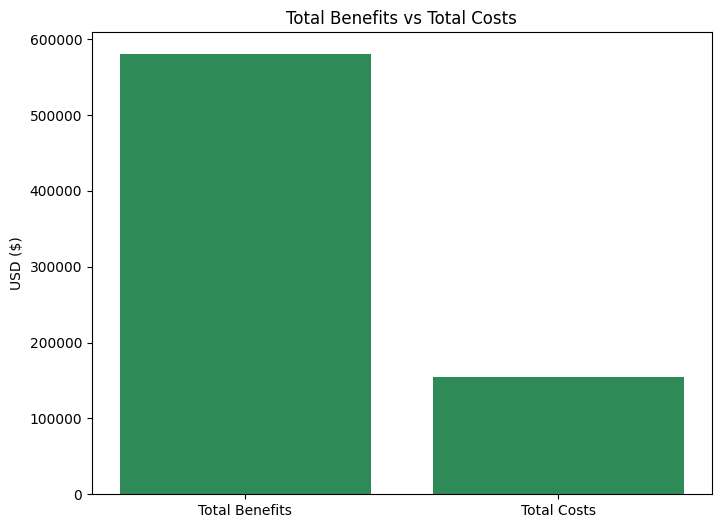

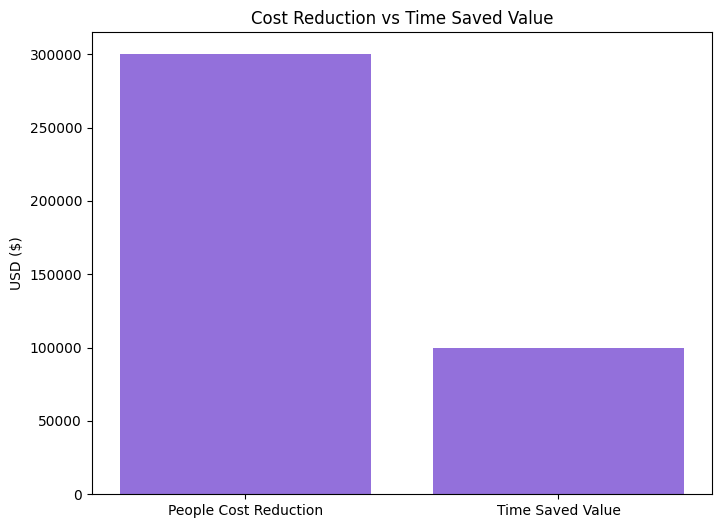

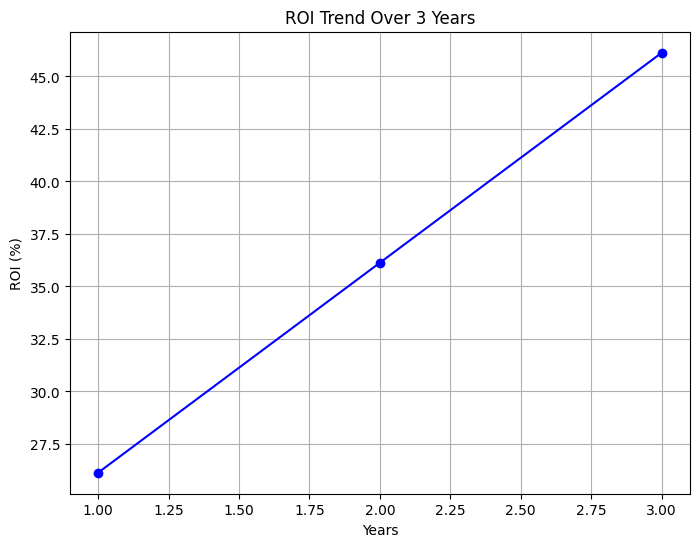

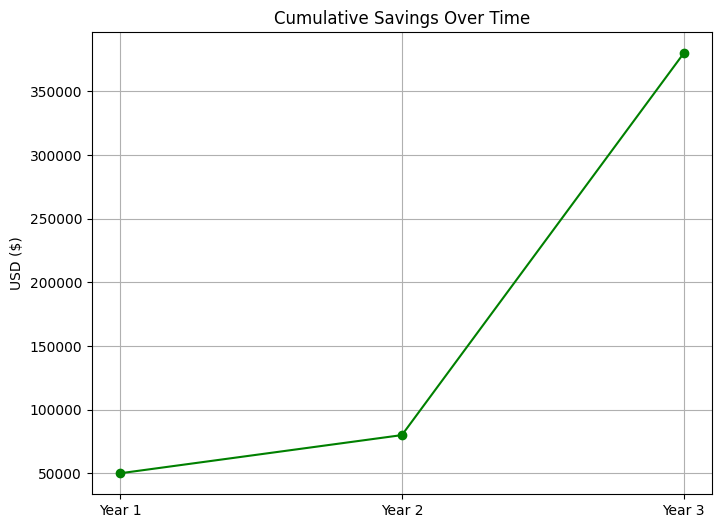

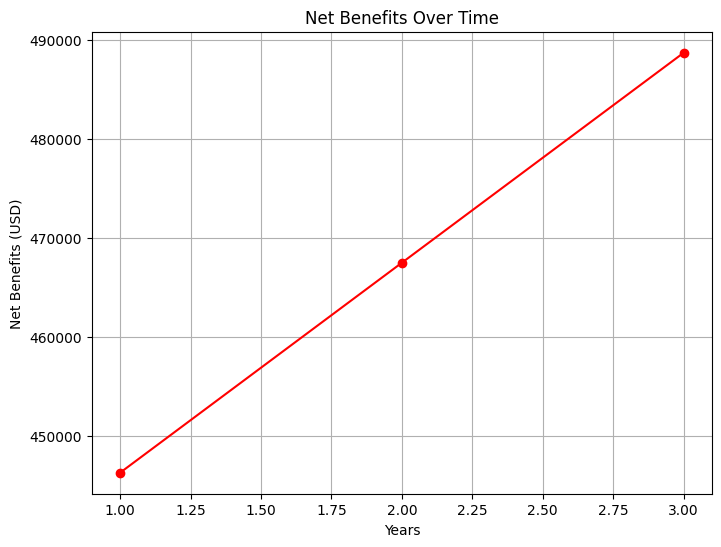

Total Benefits:,"$580,000.00"
Total Costs:,"$155,000.00"
Net Benefits:,"$425,000.00"
ROI:,274.19% (positive)
People Cost Reduction:,"$300,000.00"
Time Saved Value:,"$100,000.00"


In [1]:

import os

# Ensure the Streamlit configuration folder exists
config_dir = os.path.expanduser("~/.streamlit")
os.makedirs(config_dir, exist_ok=True)

# Define the path for the config.toml file
config_path = os.path.join(config_dir, "config.toml")

# Write the configuration to enable iframe embedding
with open(config_path, "w") as config_file:
    config_file.write("[server]\nenableCORS = false\n")


# AgentIQ ROI Measurement Application
# This code calculates the ROI for adopting Agentic AI services provided by Sonata Software using advanced metrics and generates interactive visualizations.

# Recommended Python version: 3.8 or higher for compatibility with all libraries used.

# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import VBox, HBox, Label, FloatText, IntText, Button, Output, Accordion
from IPython.display import display, HTML
import tempfile
import os
from datetime import datetime

# Step 2: Define the ROI calculator function with input validation
def calculate_roi_agentiq(revenue_increase, cost_savings, productivity_gains,
                          development_costs, maintenance_costs, training_costs,
                          licensing_costs, cloud_costs, support_ops_costs,
                          people_removed, average_salary, time_saved_hours,
                          hourly_rate):
    """
    This function calculates ROI by considering multiple pillars and metrics.
    Parameters:
    - revenue_increase: Increase in revenue due to AI adoption (USD)
    - cost_savings: Savings in operational costs (USD)
    - productivity_gains: Monetary value of productivity improvements (USD)
    - development_costs: Initial development costs (USD)
    - maintenance_costs: Ongoing maintenance costs (USD)
    - training_costs: Costs for employee training (USD)
    - licensing_costs: AI licensing costs (USD)
    - cloud_costs: Cloud infrastructure costs (USD)
    - support_ops_costs: Support and operations costs (USD)
    - people_removed: Number of people removed from processes
    - average_salary: Average annual salary of removed people (USD)
    - time_saved_hours: Total hours saved annually due to AI (hours)
    - hourly_rate: Average hourly rate of employees (USD/hour)
    Returns:
    - Dictionary containing ROI metrics.
    """
    # Input validation
    if any(param < 0 for param in [revenue_increase, cost_savings, productivity_gains,
                                   development_costs, maintenance_costs, training_costs,
                                   licensing_costs, cloud_costs, support_ops_costs,
                                   average_salary, time_saved_hours, hourly_rate]):
        raise ValueError("Inputs must be non-negative values.")
    if people_removed < 0:
        raise ValueError("Number of people removed cannot be negative.")
    
    # Calculate total benefits
    time_saved_value = time_saved_hours * hourly_rate
    people_cost_reduction = people_removed * average_salary
    total_benefits = revenue_increase + cost_savings + productivity_gains + time_saved_value + people_cost_reduction

    # Calculate total costs
    total_costs = (development_costs + maintenance_costs + training_costs +
                   licensing_costs + cloud_costs + support_ops_costs)

    # Calculate net benefits and ROI
    net_benefits = total_benefits - total_costs
    roi = (net_benefits / total_costs) * 100 if total_costs != 0 else 0

    return {
        "Total Benefits": f"{total_benefits:,.2f}",
        "Total Costs": f"{total_costs:,.2f}",
        "Net Benefits": f"{net_benefits:,.2f}",
        "ROI (%)": f"{roi:,.2f}",
        "People Cost Reduction": f"{people_cost_reduction:,.2f}",
        "Time Saved Value": f"{time_saved_value:,.2f}"
    }

# Step 3: Create categorized widgets for user input
revenue_inputs = VBox([
    Label("Revenue Metrics: Input values representing the expected increase in revenue, cost savings, and productivity gains from adopting Agentic AI."),
    FloatText(description="Revenue Increase ($)", value=100000, layout={'width': '100%'}),
    FloatText(description="Cost Savings ($)", value=50000, layout={'width': '100%'}),
    FloatText(description="Productivity Gains ($)", value=30000, layout={'width': '100%'}),
])

cost_inputs = VBox([
    Label("Cost Metrics: Input all relevant costs incurred during the AI adoption process, such as development, maintenance, training, licensing, cloud, and support."),
    FloatText(description="Development Cost ($)", value=80000, layout={'width': '100%'}),
    FloatText(description="Maintenance Cost ($)", value=20000, layout={'width': '100%'}),
    FloatText(description="Training Cost ($)", value=10000, layout={'width': '100%'}),
    FloatText(description="Licensing Cost ($)", value=15000, layout={'width': '100%'}),
    FloatText(description="Cloud Cost ($)", value=20000, layout={'width': '100%'}),
    FloatText(description="Support & Ops Cost ($)", value=10000, layout={'width': '100%'})
])

people_inputs = VBox([
    Label("People Metrics: Provide details on workforce changes, such as the number of people removed from processes and their average salary."),
    IntText(description="People Removed", value=5, layout={'width': '100%'}),
    FloatText(description="Average Salary ($)", value=60000, layout={'width': '100%'})
])

time_inputs = VBox([
    Label("Time Metrics: Specify the total hours saved annually due to AI adoption and the average hourly rate of employees."),
    FloatText(description="Time Saved (hours)", value=2000, layout={'width': '100%'}),
    FloatText(description="Hourly Rate ($)", value=50, layout={'width': '100%'})
])

other_inputs = VBox([
    Label("Additional Metrics: Input any other miscellaneous costs or savings relevant to the ROI calculation."),
    FloatText(description="Miscellaneous Costs ($)", value=5000, layout={'width': '100%'}),
    FloatText(description="Miscellaneous Savings ($)", value=3000, layout={'width': '100%'}),
])

accordion = Accordion(children=[revenue_inputs, cost_inputs, people_inputs, time_inputs, other_inputs])
accordion.set_title(0, 'Revenue Metrics')
accordion.set_title(1, 'Cost Metrics')
accordion.set_title(2, 'People Metrics')
accordion.set_title(3, 'Time Metrics')
accordion.set_title(4, 'Additional Metrics')

# Display the grouped widgets
display(accordion)

# Step 4: Function to handle button click and calculate ROI
def on_calculate_button_clicked(b):
    inputs = {
        "revenue_increase": revenue_inputs.children[1].value,
        "cost_savings": revenue_inputs.children[2].value,
        "productivity_gains": revenue_inputs.children[3].value,
        "development_costs": cost_inputs.children[1].value,
        "maintenance_costs": cost_inputs.children[2].value,
        "training_costs": cost_inputs.children[3].value,
        "licensing_costs": cost_inputs.children[4].value,
        "cloud_costs": cost_inputs.children[5].value,
        "support_ops_costs": cost_inputs.children[6].value,
        "people_removed": people_inputs.children[1].value,
        "average_salary": people_inputs.children[2].value,
        "time_saved_hours": time_inputs.children[1].value,
        "hourly_rate": time_inputs.children[2].value
    }
    try:
        results = calculate_roi_agentiq(**inputs)
        display(pd.DataFrame([results]))

        # Generate graphs
        generate_graphs(inputs, results)
        display(HTML("""
            <h3>Why Sonata Software?</h3>
            <p>Sonata Software is the ideal partner for Agentic AI implementation due to its proven expertise in AI-driven transformations, a comprehensive Agent Marketplace, and end-to-end support services. By leveraging tailored AI strategies, Sonata helps businesses maximize ROI by driving revenue growth, enhancing productivity, and reducing operational costs. With a focus on delivering measurable business outcomes, Sonata ensures seamless integration and long-term success for AI initiatives.</p>
            """))
        # Generate summary as downloadable HTML
        generate_summary(inputs, results)
    except ValueError as e:
        display(f"Error: {e}")

# Step 5: Button to trigger calculation
calculate_button = Button(description="Calculate ROI", button_style='success')
calculate_button.on_click(on_calculate_button_clicked)
display(calculate_button)

# Step 6: Generate graphs
def generate_graphs(inputs, results):
    revenue = inputs['revenue_increase'] + inputs['cost_savings'] + inputs['productivity_gains']
    total_costs = inputs['development_costs'] + inputs['maintenance_costs'] + inputs['training_costs'] + inputs['licensing_costs'] + inputs['cloud_costs'] + inputs['support_ops_costs']
    years = np.arange(1, 4)
    roi_trend = [((revenue - total_costs) / total_costs) * 100 + i * 10 for i in years]

    # Graph 1: Revenue Components
    revenue_data = pd.DataFrame({
        'Component': ['Revenue Increase', 'Cost Savings', 'Productivity Gains'],
        'Value': [inputs['revenue_increase'], inputs['cost_savings'], inputs['productivity_gains']]
    })
    plt.figure(figsize=(8, 6))
    plt.bar(revenue_data['Component'], revenue_data['Value'], color='steelblue')
    plt.title('Revenue Components')
    plt.ylabel('USD ($)')
    plt.xlabel('')
    plt.show()
    display(HTML("<p><strong>Graph Explanation:</strong> This graph illustrates how different revenue components contribute to total benefits, helping prioritize areas with the highest potential for ROI improvement.</p>"))

    # Graph 2: Cost Breakdown
    cost_data = pd.DataFrame({
        'Component': ['Development', 'Maintenance', 'Training', 'Licensing', 'Cloud', 'Support & Ops'],
        'Value': [inputs['development_costs'], inputs['maintenance_costs'], inputs['training_costs'], inputs['licensing_costs'], inputs['cloud_costs'], inputs['support_ops_costs']]
    })
    plt.figure(figsize=(8, 6))
    plt.bar(cost_data['Component'], cost_data['Value'], color='firebrick')
    plt.title('Cost Breakdown')
    plt.ylabel('USD ($)')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    display(HTML("<p><strong>Graph Explanation:</strong> This graph shows the cost distribution, helping identify major cost drivers and areas where optimization can reduce total costs.</p>"))

    # Graph 3: Total Benefits vs Total Costs
    comparison_data = pd.DataFrame({
        'Category': ['Total Benefits', 'Total Costs'],
        'Value': [float(results['Total Benefits'].replace(',', '')), float(results['Total Costs'].replace(',', ''))]
    })
    plt.figure(figsize=(8, 6))
    plt.bar(comparison_data['Category'], comparison_data['Value'], color='seagreen')
    plt.title('Total Benefits vs Total Costs')
    plt.ylabel('USD ($)')
    plt.xlabel('')
    plt.show()
    display(HTML("<p><strong>Graph Explanation:</strong> This graph compares total benefits with total costs, demonstrating whether the investment in Agentic AI results in a net gain.</p>"))

    # Graph 4: People Cost Reduction vs Time Saved Value
    savings_data = pd.DataFrame({
        'Category': ['People Cost Reduction', 'Time Saved Value'],
        'Value': [float(results['People Cost Reduction'].replace(',', '')), float(results['Time Saved Value'].replace(',', ''))]
    })
    plt.figure(figsize=(8, 6))
    plt.bar(savings_data['Category'], savings_data['Value'], color='mediumpurple')
    plt.title('Cost Reduction vs Time Saved Value')
    plt.ylabel('USD ($)')
    plt.xlabel('')
    plt.show()
    display(HTML("<p><strong>Graph Explanation:</strong> This graph highlights the value of reducing personnel costs and saving time, leading to significant operational efficiency improvements.</p>"))

    # Graph 5: ROI Trend Over 3 Years
    plt.figure(figsize=(8, 6))
    plt.plot(years, roi_trend, marker='o', color='blue')
    plt.title('ROI Trend Over 3 Years')
    plt.xlabel('Years')
    plt.ylabel('ROI (%)')
    plt.grid(True)
    plt.show()
    display(HTML("<p><strong>Graph Explanation:</strong> This line chart shows the projected increase in ROI over three years, assuming consistent revenue growth and cost optimization.</p>"))

    # Graph 6: Cumulative Savings Over Time
    cumulative_savings = np.cumsum([inputs['cost_savings'], inputs['productivity_gains'], inputs['people_removed'] * inputs['average_salary']])
    plt.figure(figsize=(8, 6))
    plt.plot(['Year 1', 'Year 2', 'Year 3'], cumulative_savings, marker='o', color='green')
    plt.title('Cumulative Savings Over Time')
    plt.ylabel('USD ($)')
    plt.grid(True)
    plt.show()
    display(HTML("<p><strong>Graph Explanation:</strong> This graph displays the cumulative impact of various savings sources over time, indicating increasing benefits year-over-year.</p>"))

    # Graph 7: Net Benefits Over Time
    net_benefits_over_time = [float(results['Net Benefits'].replace(',', '')) * (1 + i * 0.05) for i in years]
    plt.figure(figsize=(8, 6))
    plt.plot(years, net_benefits_over_time, marker='o', color='red')
    plt.title('Net Benefits Over Time')
    plt.xlabel('Years')
    plt.ylabel('Net Benefits (USD)')
    plt.grid(True)
    plt.show()
    display(HTML("<p><strong>Graph Explanation:</strong> This graph shows how net benefits are expected to grow over three years, reinforcing the long-term value of investing in Agentic AI.</p>"))

# Step 7: Summary Report

def generate_summary(inputs, results):
    roi_status = "positive" if float(results['ROI (%)'].replace(',', '')) > 0 else "negative"
    summary_html = f"""
    <html>
    <head><title>ROI Summary Report</title></head>
    <body style="font-family: Arial, sans-serif; line-height: 1.6;">
        <h2 style="color: #2E86C1;">ROI Summary Report</h2>
        <hr>
        <table border="1" cellpadding="10" style="border-collapse: collapse; width: 100%;">
            <tr style="background-color: #f2f2f2;"><td><strong>Total Benefits:</strong></td><td>${results['Total Benefits']}</td></tr>
            <tr><td><strong>Total Costs:</strong></td><td>${results['Total Costs']}</td></tr>
            <tr style="background-color: #f2f2f2;"><td><strong>Net Benefits:</strong></td><td>${results['Net Benefits']}</td></tr>
            <tr><td><strong>ROI:</strong></td><td>{results['ROI (%)']}% ({roi_status})</td></tr>
            <tr style="background-color: #f2f2f2;"><td><strong>People Cost Reduction:</strong></td><td>${results['People Cost Reduction']}</td></tr>
            <tr><td><strong>Time Saved Value:</strong></td><td>${results['Time Saved Value']}</td></tr>
        </table>
        <hr>
        <p>Generated on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>
        <p><strong>Explanation:</strong> This ROI summary provides key financial metrics derived from adopting Agentic AI, highlighting significant cost reductions, time savings, and overall financial benefits. The ROI status indicates whether the investment yields a positive or negative return, helping stakeholders assess the financial impact effectively.</p>
    </body>
    </html>
    """

    # Display the summary report directly
    display(HTML(summary_html))

    # Provide a downloadable link for the summary report
    temp_dir = tempfile.gettempdir()
    file_path = os.path.join(temp_dir, "roi_summary_report.html")
    with open(file_path, "w") as file:
        file.write(summary_html)
    display(HTML(f"<a href='file://{file_path}' target='_blank' style='color: #2E86C1; text-decoration: none;'>Download ROI Summary Report</a>"))
